In [ ]:
#this is an extension of the decision tree Homework.
#make sure you do this after completing HomeWork Week7
# See the codes previously written for Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline

# read the data

In [2]:
#read thru this link to know more abput the data
#https://archive.ics.uci.edu/ml/datasets/Adult
#lets read the data directly from the website
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Salary'])

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Salary']

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df1=pd.get_dummies((df.drop(["age","capital-gain","capital-loss","hours-per-week","Salary"],axis=1)),drop_first=True)
df_new=pd.concat([df,df1],axis=1)

In [6]:
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2=df_new.drop(["workclass",'fnlwgt',"education","education-num","marital-status","occupation","relationship","race","sex","native-country"],axis=1)
df2.head()

,age,capital-gain,capital-loss,hours-per-week,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df3=df2[['age','hours-per-week','capital-gain','marital-status_ Married-civ-spouse','capital-loss','marital-status_ Never-married','education_ Bachelors','occupation_ Exec-managerial','occupation_ Prof-specialty','relationship_ Not-in-family','sex_ Male','education_ HS-grad','education_ Masters','relationship_ Own-child','workclass_ Private','education_ Some-college','workclass_ Self-emp-not-inc','relationship_ Unmarried','relationship_ Wife','occupation_ Other-service','education_ Prof-school','native-country_ United-States','occupation_ Sales','race_ White','occupation_ Craft-repair','workclass_ Local-gov','workclass_ Self-emp-inc','workclass_ Federal-gov','education_ Doctorate','occupation_ Adm-clerical','education_ Assoc-voc','occupation_ Tech-support','race_ Black','workclass_ State-gov','occupation_ Transport-moving','occupation_ Machine-op-inspct','education_ Assoc-acdm','occupation_ Farming-fishing','education_ 7th-8th','education_ 11th']]

In [25]:
df3.shape

(32561, 40)

In [31]:
indep1=list(df2.columns)

In [32]:
indep1

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Salary',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishin

In [33]:
indep1.remove(indep1[4])

In [34]:
indep1

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occup

In [4]:
#dependent variable is whether the person earns >50k or <=50k

# split the data 

In [26]:
#split the data into train & test using a random seed. Take seed as  1 so that all get the same answer
#take all columns as IV and <=50K as Dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3,df2['Salary'],test_size=0.3,random_state=0)




In [ ]:
#build a Decision tree and give the max_depth as a variable x. Keep this Code in a loop and start the
#variable from depth(x)=1 to depth x=50... 
#using this predict on the train data and also on the test data....
#keep saving the accuracy for both train and test data INTO 2 VARIABLES (LISTS/ARAYS) and for each depth (1 to 50) and finally prepare 
# 2 plots...

#plot #1-------- for training data
#x axis shud be depth (1 to 50)
#y axi shud be train data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud
#gradually increase...as depth increasees


#plot #2---- for test data
#x axis shud be depth (1 to 50)
#y axi shud be test data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud 
#gradually increase for higher depth and then strat decreasing again...as depth beocmes too big..
# this will be due to OVERfittinG...

# through this Homework OVERFITTING SHUD BE CLEAR TO YOU IN DECISION TREEE.......
#U CAN DISCUSS WITHIN YOUSELVESS... 

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [11]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [12]:
Train_A=[]
Test_A=[]
for x in range(1,51):
    cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=x)
    cl_tree=cl_tree.fit(X_train,y_train)
    pred_train=cl_tree.predict(X_train)
    pred_test=cl_tree.predict(X_test)
    Train_A.append(accuracy_score(y_train,pred_train))
    Test_A.append(accuracy_score(y_test,pred_test))

In [13]:
a1=pd.DataFrame(Train_A,columns=['Train_A'])
a2=pd.DataFrame(Test_A,columns=['Test_A'])

In [23]:
df_com=pd.concat([a1,a2],axis=1)
df_com

,Train_A,Test_A
0,0.759609,0.758215
1,0.828361,0.827925
2,0.843629,0.844406
3,0.843893,0.844099
4,0.852141,0.851367
5,0.857011,0.855256
6,0.859819,0.856485
7,0.862320,0.857201
8,0.868550,0.855768
9,0.871007,0.856485


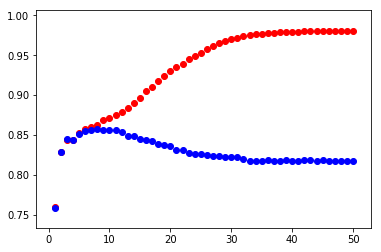

In [17]:
plt.scatter(range(1,51),Train_A,color='red')
plt.scatter(range(1,51),Test_A,color='blue')

# ALL THE BEST!!

# Homework task

In [19]:
#from the above plot-- determine the best value of the Depth parameter--
#use this Depth parameter value and create the best possible tree
#Write the codes for the final tree here---

c2_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=10)
c2_tree=c2_tree.fit(X_train,y_train)
pred_train=c2_tree.predict(X_train)
print(pd.crosstab(y_train,pred_train))
print("*********")
pred_test=c2_tree.predict(X_test)
print(pd.crosstab(y_test,pred_test))

col_0    <=50K   >50K
Salary               
 <=50K   16536    777
 >50K     2163   3316
*********
col_0    <=50K   >50K
Salary               
 <=50K    6998    409
 >50K      993   1369


In [20]:
Accuracy_train=(16536+3316)/(16536+777+2163+3316)
print(Accuracy_train)

0.871007371007371


In [22]:
Accuracy_test=(6998+1369)/(6998+1369+409+993)
print(Accuracy_test)

0.8564847988535162


# RandomForest task

In [6]:
#Lets see how a RF mode does in compariosn to the best Decision tree that we built earlier
#Prepare a RF model.. With all the variables ( you may omit ID etc variables, its to your discretion)
#build a RF model on the training data
# Play around with the parameters-n_estimators & max_features(default value p^0.5,p=Total# of columns)
#write the codes here----






In [38]:
df2.shape

(32561, 99)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[indep1],df2['Salary'],test_size=0.3,random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,max_features=6,oob_score=True)
#n_estimators== # of trees that you want => No.of samples that will be taken Each a bagged sample.
#max_features=> The max no.of columns to be considered at each decision node..
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [36]:
#Check the accuracy of the RF model on the test data---
#Do a few iteration and come up with the best model...


In [28]:
rfc_pred_train = rfc.predict(X_train)
print(pd.crosstab(y_train,rfc_pred_train))

col_0    <=50K   >50K
Salary               
 <=50K   17114    199
 >50K      277   5202


In [71]:
Accuracy_train=(17125+5213)/(17125+5213+266+188)
print(Accuracy_train)

0.98008073008073


In [29]:
rfc_pred_test = rfc.predict(X_test)
print(pd.crosstab(y_test,rfc_pred_test))

col_0    <=50K   >50K
Salary               
 <=50K    6798    609
 >50K      886   1476


In [87]:
Accuracy_test=(6810+1485)/(6810+1485+877+597)
print(Accuracy_test)

0.8491145460128979


In [45]:
rfc.oob_score_

0.84235696735696741

In [ ]:
#compare the acuracy with others in the class...... 




#note:-- the accuracies wont match exatcly with others as the split 
#might be done with different random seed. Also random Forest has a random component to it.
#so some1 else' RF will be different from yours,
#BUT ACCURACIES SHUD BE COMPARABLE---- +/=5%






#Look out the OOB error and see if the OB error on training matches with the error on the test data
#ideally it should match approximately. 
#If you donot understand y it shud match...watch the recordings..and come back to the assignment..





#Create the Variable importance plot for the final RF model..
#write the codes here--






In [ ]:
#Identify the important vriables from the Var Importnce plot and Run a 
# Decisio Tree Model once again from stratch.....
#again play with the parameters of DT...
#IS this Model better than the previous DT model...Idelaly it shud be...
#discuss this with the class...





#gudnytss..-----------